In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import statsmodels.api as sm

C:\Users\Raja\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
hdata= pd.read_csv(r"C:\Users\Raja\Desktop\capstone\heartattackdataset.csv")

# Exploratory Data Analysis(EDA)

In [4]:
hdata.shape

(340, 14)

In [5]:
hdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
hdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,54.400000,0.685294,0.973529,131.864706,246.152941,0.141176,0.538235,150.335294,0.320588,1.052647,1.402941,0.758824,2.320588,0.538235
std,9.157037,0.465083,1.034453,17.398486,51.613553,0.348717,0.522370,23.026327,0.467391,1.149949,0.618775,1.050668,0.604935,0.499271
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,154.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.250000,0.000000,1.000000,168.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
age         340 non-null int64
sex         340 non-null int64
cp          340 non-null int64
trestbps    340 non-null int64
chol        340 non-null int64
fbs         340 non-null int64
restecg     340 non-null int64
thalach     340 non-null int64
exang       340 non-null int64
oldpeak     340 non-null float64
slope       340 non-null int64
ca          340 non-null int64
thal        340 non-null int64
target      340 non-null int64
dtypes: float64(1), int64(13)
memory usage: 37.3 KB


In [8]:
print("Is there is any null value is not---",hdata.isnull().values.any())

Is there is any null value is not--- False


In [9]:
hdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

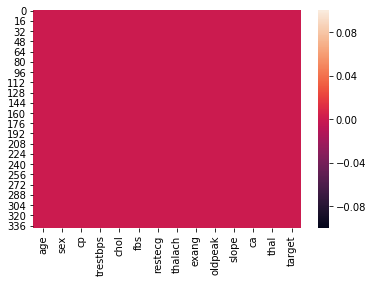

In [10]:
sns.heatmap(hdata.isnull())

In [11]:
hdata.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.116504,-0.112544,0.269981,0.247379,0.119908,-0.171563,-0.421110,0.124337,0.222914,-0.191480,0.229279,0.067843,-0.227892
sex,-0.116504,1.000000,-0.060286,-0.063606,-0.216113,0.020114,-0.053532,-0.038597,0.139814,0.074092,-0.009075,0.133981,0.212873,-0.271973
cp,-0.112544,-0.060286,1.000000,0.044053,-0.108765,0.100342,0.075575,0.291772,-0.378969,-0.134716,0.113490,-0.187735,-0.174955,0.450321
trestbps,0.269981,-0.063606,0.044053,1.000000,0.109746,0.208334,-0.107836,-0.053586,0.059762,0.172403,-0.098769,0.103746,0.059067,-0.131163
chol,0.247379,-0.216113,-0.108765,0.109746,1.000000,0.008303,-0.170351,-0.044405,0.072430,0.058550,-0.003413,0.041697,0.091107,-0.089859
fbs,0.119908,0.020114,0.100342,0.208334,0.008303,1.000000,-0.078302,-0.005178,0.029171,-0.003877,-0.045677,0.109307,-0.019413,-0.014152
restecg,-0.171563,-0.053532,0.075575,-0.107836,-0.170351,-0.078302,1.000000,0.085993,-0.080559,-0.072847,0.102777,-0.069144,-0.024902,0.152727
thalach,-0.421110,-0.038597,0.291772,-0.053586,-0.044405,-0.005178,0.085993,1.000000,-0.383878,-0.338409,0.379301,-0.197100,-0.079954,0.396083
exang,0.124337,0.139814,-0.378969,0.059762,0.072430,0.029171,-0.080559,-0.383878,1.000000,0.299452,-0.254183,0.115864,0.209244,-0.438237
oldpeak,0.222914,0.074092,-0.134716,0.172403,0.058550,-0.003877,-0.072847,-0.338409,0.299452,1.000000,-0.580853,0.200489,0.205499,-0.425595


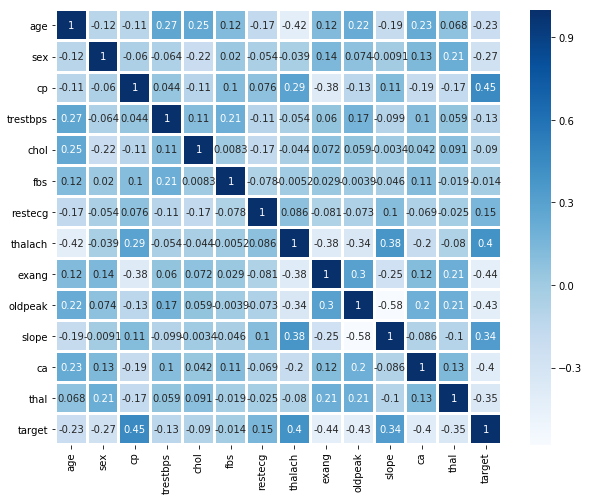

In [12]:
#how the data is correlated
plt.figure(figsize=(10,8))
http = sns.heatmap(hdata.corr(), annot = True , cmap = 'Blues',linewidths=2)
plt.show()

In [13]:
hdata.target.value_counts()

1    183
0    157
Name: target, dtype: int64

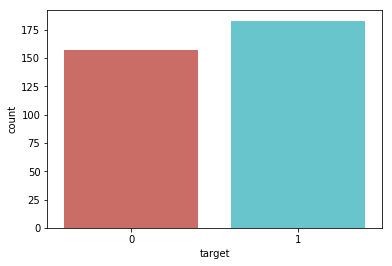

In [14]:
sns.countplot(x="target", data=hdata, palette="hls")
plt.show()

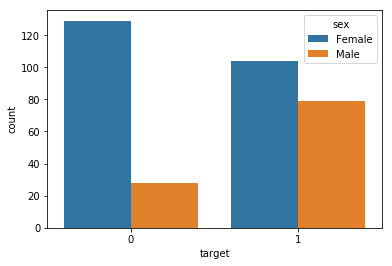

In [15]:
hdata['sex'] = hdata['sex'].apply(lambda x:'Male' if x == 0 else 'Female')
sns.countplot(x = 'target',data = hdata,hue = 'sex')

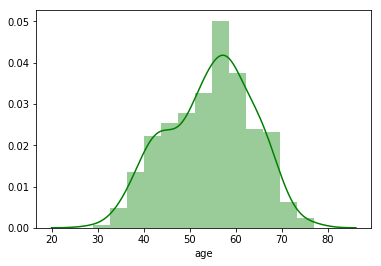

In [16]:
#look at age distribution
http = sns.distplot(hdata.age , color = 'green' , )

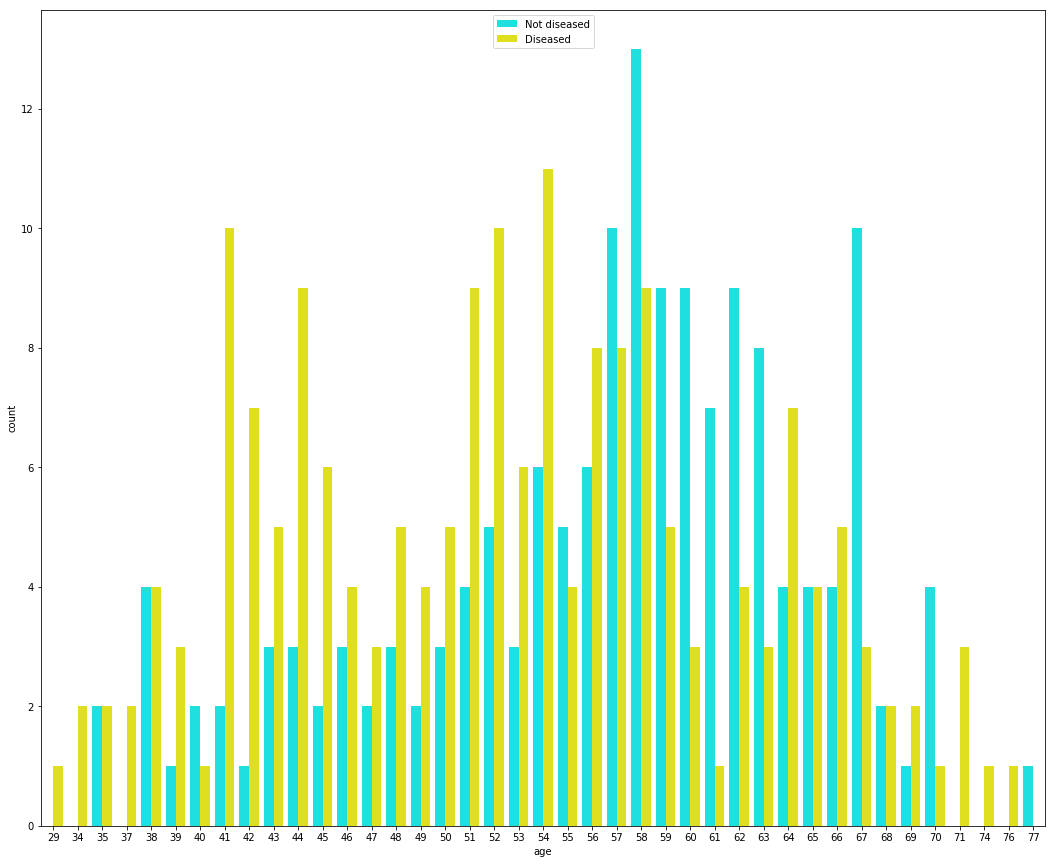

In [17]:
plt.figure(figsize = (18,15))
sns.countplot(x = 'age',hue = 'target',data =hdata,palette = ['cyan','yellow'])
plt.legend(["Not diseased","Diseased"])

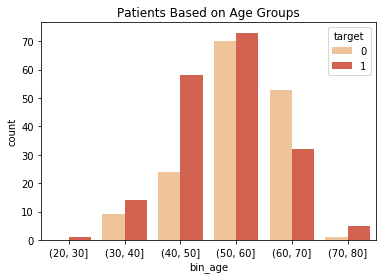

In [18]:
#pair age with heart diseases using bin
age_bins = [20,30,40,50,60,70,80]
fttp= pd.cut(hdata.age , bins = age_bins)
hdata['bin_age'] = fttp
hdata.head()
pt=sns.countplot(x='bin_age',data=hdata ,palette='OrRd',linewidth=3 , hue = 'target')
pt.set_title("Patients Based on Age Groups")
plt.show(pt)

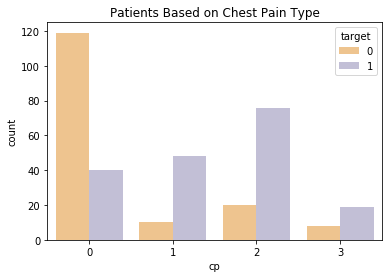

In [19]:
#the heart patients get chest pain
ftp=sns.countplot(x= 'cp',data=hdata ,palette='PuOr',linewidth=3 , hue = 'target')
ftp.set_title("Patients Based on Chest Pain Type")
plt.show(ftp)

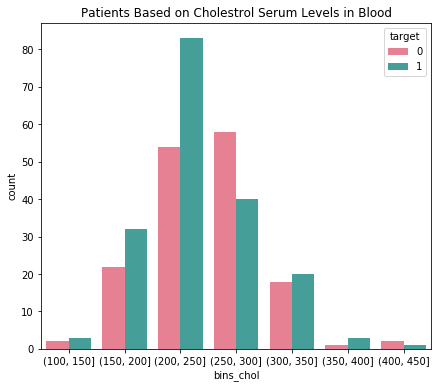

In [20]:
#Cholestrol and Heart Diseases
plt.figure(figsize=(7,6))
chol_bins = [100,150,200,250,300,350,400,450]
data = pd.cut(hdata.chol , bins = chol_bins)
hdata['bins_chol'] = data
http=sns.countplot(x= 'bins_chol',data=hdata ,palette='husl',linewidth=3 , hue = 'target')
http.set_title("Patients Based on Cholestrol Serum Levels in Blood")
plt.show(http)

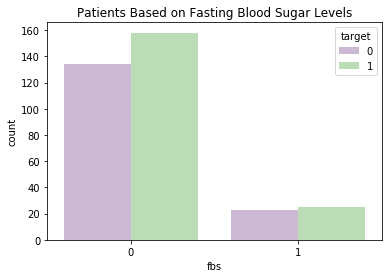

In [21]:
#Patients Based on Fasting Blood Sugar Levels
fb=sns.countplot(x= 'fbs',data=hdata ,palette='PRGn',linewidth=3 , hue = 'target')
fb.set_title("Patients Based on Fasting Blood Sugar Levels")
plt.show(fb)

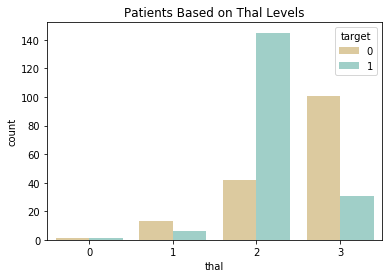

In [22]:
#Patients Based on Thal Levels
th=sns.countplot(x= 'thal',data=hdata ,palette='BrBG',linewidth=3 , hue = 'target')
th.set_title("Patients Based on Thal Levels")
plt.show(th)

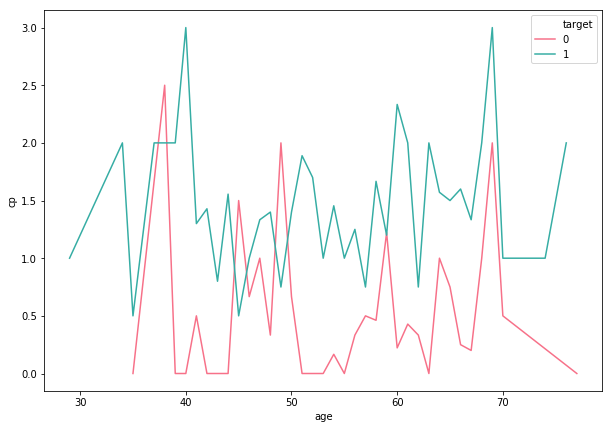

In [23]:
plt.figure(figsize=(10,7))
fig= sns.lineplot(data =hdata, x = 'age', y='cp',hue='target' , ci = None , palette='husl')

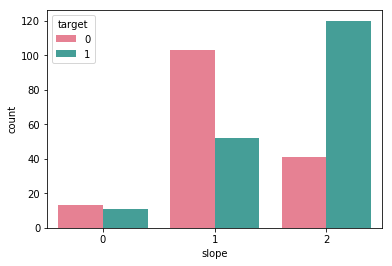

In [24]:
fttp= sns.countplot(data = hdata , x = 'slope' , hue = 'target', palette='husl' )

# Machine_Learning_Model

In [25]:
hdata['sex'] =hdata['sex'].apply(lambda x:0 if x == 'Male' else 1)

In [26]:
hdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin_age,bins_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]","(200, 250]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]","(200, 250]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]","(200, 250]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]","(200, 250]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]","(350, 400]"


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
scaler = StandardScaler()

In [29]:
x = hdata.drop(['target','bin_age','bins_chol'],axis = 1)
y = hdata['target']
x = scaler.fit_transform(x)

C:\Users\Raja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Raja\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
class classifier:
    def __init__(self,model,x,y):
        self.model = model
        self.x = x
        self.y = y
        self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(x,y,test_size = 0.3,random_state = 17)
        self.model.fit(self.x_train,self.y_train)
        self.y_pred = self.model.predict(self.x_test)
    def confusionmatrix(self):
        cm = confusion_matrix(self.y_test,self.y_pred)
        plt.figure(figsize=(7,7))
        sns.heatmap(cm,square = True,annot = True,cbar = False,
                   xticklabels = ['Not Diseased','Diseased'],
                   yticklabels = ['Not Diseased','Diseased'])
        plt.title('Confusion Matrix')
        plt.xlabel('Prediction')
        plt.ylabel('True Values')
    def classificationreport(self):
        print('Classification Report')
        print(classification_report(self.y_test,self.y_pred,target_names=['Not diseased','Diseased']))
    def accuracy(self):
        self.y_train_pred = self.model.predict(self.x_train)
        print('Accuracy Score')
        print('Training Accuracy --->',accuracy_score(self.y_train,self.y_train_pred))
        print('Testing Accuracy  --->',accuracy_score(self.y_test,self.y_pred))    
    def test_accuracy(self):
        return accuracy_score(self.y_test,self.y_pred)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = classifier(model = LogisticRegression(solver = 'lbfgs'),x = x,y = y)

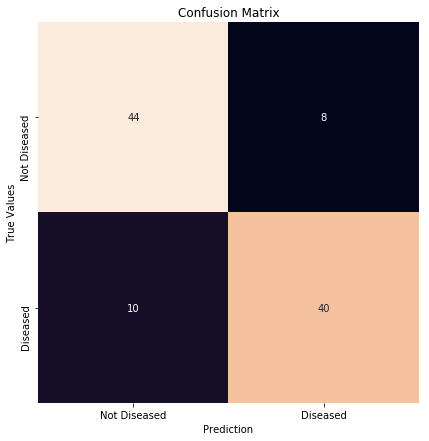

In [33]:
lr.confusionmatrix()

In [34]:
lr.classificationreport()

Classification Report
              precision    recall  f1-score   support

Not diseased       0.81      0.85      0.83        52
    Diseased       0.83      0.80      0.82        50

   micro avg       0.82      0.82      0.82       102
   macro avg       0.82      0.82      0.82       102
weighted avg       0.82      0.82      0.82       102



In [35]:
lr.accuracy()

Accuracy Score
Training Accuracy ---> 0.8613445378151261
Testing Accuracy  ---> 0.8235294117647058


# SVC

In [36]:
from sklearn.svm import SVC

In [37]:
svc = classifier(model = SVC(gamma = 'scale'),x = x,y = y)

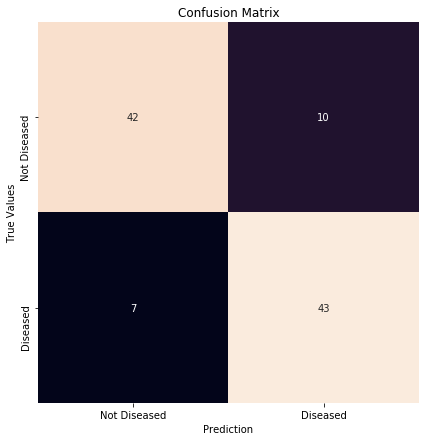

In [38]:
svc.confusionmatrix()

In [39]:
svc.classificationreport()

Classification Report
              precision    recall  f1-score   support

Not diseased       0.86      0.81      0.83        52
    Diseased       0.81      0.86      0.83        50

   micro avg       0.83      0.83      0.83       102
   macro avg       0.83      0.83      0.83       102
weighted avg       0.83      0.83      0.83       102



In [42]:
svc.accuracy()

Accuracy Score
Training Accuracy ---> 0.9243697478991597
Testing Accuracy  ---> 0.8333333333333334


# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = classifier(model = RandomForestClassifier(n_estimators=700),x = x,y = y)

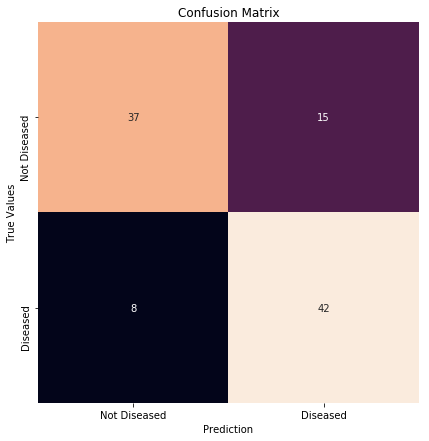

In [45]:
rfc.confusionmatrix()

In [46]:
rfc.accuracy()

Accuracy Score
Training Accuracy ---> 1.0
Testing Accuracy  ---> 0.7745098039215687


# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = classifier(model = KNeighborsClassifier(n_neighbors=105),x = x,y = y)

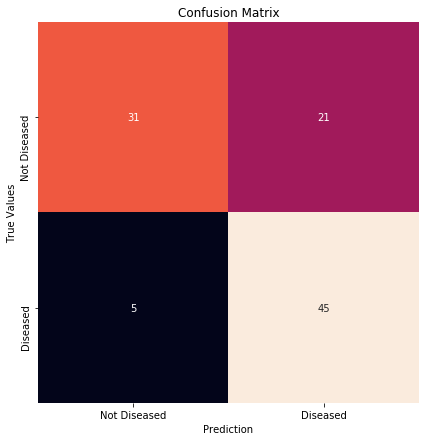

In [49]:
knn.confusionmatrix()

In [50]:
knn.classificationreport()

Classification Report
              precision    recall  f1-score   support

Not diseased       0.86      0.60      0.70        52
    Diseased       0.68      0.90      0.78        50

   micro avg       0.75      0.75      0.75       102
   macro avg       0.77      0.75      0.74       102
weighted avg       0.77      0.75      0.74       102



In [51]:
knn.accuracy()

Accuracy Score
Training Accuracy ---> 0.819327731092437
Testing Accuracy  ---> 0.7450980392156863


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt=classifier(model=DecisionTreeClassifier(splitter='random'),x = x,y = y)

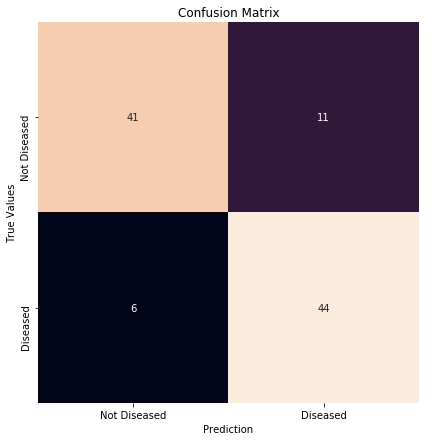

In [54]:
dt.confusionmatrix()

In [55]:
dt.classificationreport()

Classification Report
              precision    recall  f1-score   support

Not diseased       0.87      0.79      0.83        52
    Diseased       0.80      0.88      0.84        50

   micro avg       0.83      0.83      0.83       102
   macro avg       0.84      0.83      0.83       102
weighted avg       0.84      0.83      0.83       102



In [56]:
dt.accuracy()

Accuracy Score
Training Accuracy ---> 1.0
Testing Accuracy  ---> 0.8333333333333334


In [59]:
models = [lr,svc,rfc,knn,dt]
names = ['Logistic Regression','Support Vector Classifier','Random Forest Classifier','KNearestNeighbour','Decission Tree']
acc = []
for model in models:
    acc.append(model.test_accuracy())

Text(0.5, 0, '>--------Classifiers-------->')

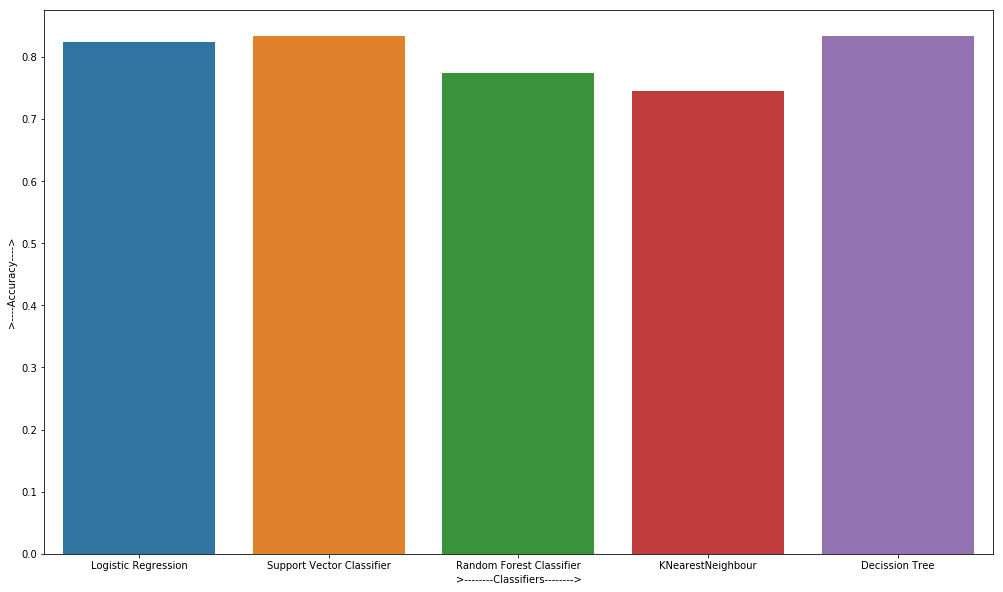

In [58]:
plt.figure(figsize=(17,10))
sns.barplot(x = names,y = acc)
plt.ylabel(">----Accuracy---->")
plt.xlabel(">--------Classifiers-------->")